<a href="https://colab.research.google.com/github/swleegit/Hongong_ML/blob/main/03_03%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 용어
- 다항회귀(polynominal regression) : 한가지 특성을 변형해서 다항식을 만듬. ex)y = ax^2+bx

- 다중회귀(multiple regression) : 여러개의 특성을 사용한 회귀  
특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있다.

- 특성공학(feature engineering) : 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

- 변환기(transformer) : 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 이러한 클래스를 변환기라고 한다.  
사이킷런의 모델 클래스에 일관된 fit(), score(), predict()메서드가 있는 것 처럼  
변환기 클래스는 모두 fit(), transform()메서드를 제공한다.
  - PolynomialFeatures, 해당 클래스들이 변환기이고, 이들은 모두 공통적으로 fit, transform메서드를 가지고 있다.

- 추정기(estimator) : 사이킷런의 모델 클래스
  - KNeighborsClassifier, KNeighborsRegression, LinearRegression.. 해당 클래스들이 추정기이며, 이들은 공통적으로 fit, score, predict메서드를 가지고 있다.


# 데이터 준비
[input](https://bit.ly/perch_csv)  
[target](http://bit.ly/perch_data)


In [ ]:
# numpy는 인터넷에서 데이터를 다운로드하여 사용할 수 있는 기능을 제공하지 않는다.
# 이는 pandas를 이용한다.

import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data") #웹에서도 데이터를 바로 받을 수 있다.
perch_full = df.to_numpy() #df.to_numpy기능으로 데이터프레임의 데이터(행,열 제외)를 numpy로 가져올 수 있다.
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
# 타깃 데이터
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 훈련, 테스트 세트 분할 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)


# 사이킷런의 변환기

In [ ]:
#sklearn패키지 아래 preprocessing 모듈아래 PolynomialFeatures 클래스(변환기)를 가져온다.
from sklearn.preprocessing import PolynomialFeatures 



#객체 생성 
poly = PolynomialFeatures()

#두개의 특성 2와3으로 이루어진 샘플 하나를 적용
#fit과 transform을 차례로 호출 
poly.fit([[2,3]]) #추정기 처럼 input data는 반드시 2차원 배열형태로 제공 
poly.transform([[2,3]])


array([[1., 2., 3., 4., 6., 9.]])

- 훈련(fit)을 해야 변환(transform)이 가능하다.

- 두 메서드를 하나로 붙인 fit_transform있다.
- fit메서드는 새롭게 만들 특성 조합을 찾고(열1*열2... 이런식임 아직 만들지는 않음)

- transform은 fit이 만들어 놓은 조합을 바탕으로 실제 데이터를 조합한다.

- 당연하게도 변환기는 타깃데이터를 필요하지 않는다.  
추정기의 fit은 input과 target을 둘다 필요한다 (지도학습)

- PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고 서로 곱한 항을 추가한다.

input에 1은 없는데 1이 추가된 이유는?

<img src = "https://drive.google.com/uc?id=1v0aqAuQV1qc_XqswTQJQicHssJ7x6Geu">  
- 선형 방정식은 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.

- 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 된다.  
그렇기 때문에 input에 전체 행의 값이 1인 열이 추가 되어있다고 생각해서 1을 포함한 계산한다.

- 하지만 사이킷런의 선형모델은 자동으로 절편을 추가한다(=특성이 1인 계수로 생각하지 않은다.)

- 따라서 include_bias=False인자를 통해 1을 제외한 계산을 한다.

- 물론 1이 포함된 특성으로 추정기에서 훈련을 해도 1을 자동적으로 제외한다.

In [ ]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [ ]:
# 이제 실제 perch_full로 특성공학을 해보자

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input) #transform은 특성공학된 데이터를 반환한다.
print(train_poly.shape)


(42, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 방법을 제공한다.  
즉 fit 했을 때 어떤 조합으로 할지를 확인할 수 있다.


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
#위에는 훈련세트를 변환한것이고 당연 테스트 세트도 변환을 해야한다.
test_poly = poly.transform(test_input)

#여기서 test_input을 위한 fit을 다시 진행할 필요는 없다.
#특성의 개수는 같고 fit은 그저 특성 조합 경우의 수만 준비하기 때문
#따라서 test_input을 따로 fit을 해도 문제가 발생하지 않는다.

#하지만 뒤에 전처리에서는 훈련세트를 기준으로 fit 한걸로 test세트 transform을 해야한다.
#따라서 항상 훈련세트를 기준(fit)으로 테스트세트를 변환하는 습관을 들이는게 중요하다.



# 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594134


선형모델은 특성이 많아질수록 성능이 좋아진다.
특성이 많아지면 더 복잡하게 표현가능하다. 즉 정확도를 높일 수 있다.
이에따라 과대적합이 일어날 수 있지만 릿지나 라쏘를 통해 규제가 가능하다.
특성이 부족한것보단 낫다.

In [ ]:
#특성을 더 많이 추가해보자.
#PolynomialFeatures는 기본적으로 2제곱을 하지만 조절 할 수 있다.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False) # 5제곱
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
poly.get_feature_names_out() #5제곱이라는 것은 자기자신 또는 상대방을 중복허용해서 곱해서 5차수되는 모든 경우의수를 의미한다.

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242684848


- 특성의 개수를 크게 늘리면 선형모델은 아주 강력해진다.  
훈련세트에 대해 거의 완벽하게 학습을 할 수 있으나 너무 과대적합되어 테스트세트에는 형편없는 점수를 나타낸다.

- 샘플의 개수(식의 수)보다 특성의수(미지수)가 많아지게되면 무수히 많은 해를 가질 수 있기 때문에 당연히 훈련세트에 대해서는 정확도가 1에 가깝다.

# 규제(regularization)
- 모델이 훈련세트에 대해 과대적합되지 않도록 만드는 것 
- 선형회귀 모델의 경우 특성에 곱해지는 계수를 작게 만드는 일 

특성의 스케일   
- 거리기반 알고리즘인 knn에서는 특성의 스케일이 중요하다.

- 선형회귀는 거리기반 알고리즘은 아니지만  
스케일이 정규화되지 않으면 여기에 곱해지는 계수값도 차이 나게된다.  
- 일반적으로 선형회귀모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다.
- 따라서 릿지,라쏘(규제모델)을 사용하기 앞서 input의 정규화가 필수다.

- 직접 훈련세트의 각 열마다 평균과 표준편차를 구해서 브로드캐스팅 기능을 이용해서 z점수로 변환할 수 있지만  
- sklearn이 제공하는 StandardScaler클래스를 사용하면 편하다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #훈련input으로 학습(=기준을 만든다음)
train_scaled = ss.transform(train_poly) #훈련 input 정규화
test_scaled = ss.transform(test_poly) #테스트 input 정규화, 특성의 수를 늘릴 때는 fit 기준이 상관없지만 정규화는 반드시 '훈련세트'로 진행한다.

print(ss.mean_)
print('\n')
print(ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03]


[8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.492

# 릿지 회귀 (RidgeRegression)

- LinearRegression에 규제를 추가한 모델을 릿지와 라쏘라고 부른다.

두 모델은 규제를 가하는 방법이 다르다.  
- 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고
- 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

- 일반적으로 릿지를 조금 더 선호한다.

- 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다.


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [ ]:
#ridge모델로 과대적합이 해소되었음을 알 수 있다.
#규제의 양은 alpha로 조정한다. alpha값이 커지면 규제가 커져 계수값은 작아진다
#과소적합이 되도록 유도한다.


- alpha값은 릿지 모델이 학습하는 것이 아니라 사전에 우리가 지정해야되는 것
- 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼 파라미터(매개변수)**라고 부른다.
- 이 책에서 모델이 학습한 파라미터는 (ex. 계수, 절편) 모델 파라미터라고 한다.

In [ ]:
#적절한 alpha값을 찾는 방법은 alpha값에 대한 결정계수 값의 그래프를 그리는 것
#훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1,1,10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

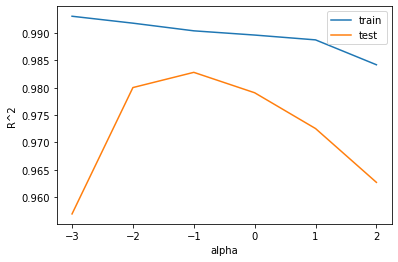

In [ ]:
#y값은 최대값이 1인데 x값은 최대값이 100이니 그래프 scale이 달라 시각화에 좋지 않음
#x에 상용로그를 취하자.

plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
#로그값을 고려하면 -1는 alpha 0.1일때
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1).fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


# 라쏘(Lasso)
- 훈련방법은 Ridge와 동일 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


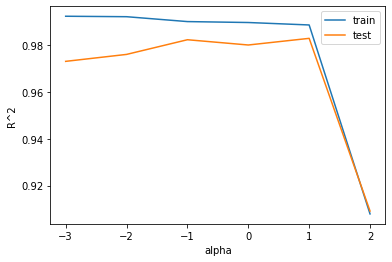

In [ ]:
#최적의 alpha값을 찾아보자.
from sklearn.linear_model import Lasso

train_score = []
test_score = []

alpha_list = [0.001 * 10 ** n for n in range(6)]

#ConvergenceWarning 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 뜬다.
#max_iter로 지정할 수 있다. 
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000).fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, label = 'train')
plt.plot(np.log10(alpha_list), test_score, label = 'test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(loc = 'best')
plt.show()



In [ ]:
lasso = Lasso(alpha = 0.1).fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.990137631128448
0.9819405116249363


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#lasso는 계수를 0으로 만들 수 있다.
print(lasso.coef_)

[  0.           0.          -0.          88.01171509  10.83995395
   0.           8.76163845   0.          17.60158102  36.90358346
  20.76647438   0.          15.47388351   0.           0.
   5.32869238   0.           0.          60.0394628    0.
   0.          -0.           0.          -0.          -0.
  11.36615139   0.          -0.           0.           2.33791322
   0.          -0.           0.          48.74630302  -0.
   0.          -0.           0.          -0.         -29.17112552
  40.96967668  -0.          -9.93382809 -23.43259464  50.14443615
  -0.          -5.96575623 -13.94013436  -0.          20.2657082
  -0.          -0.          -0.          -0.           0.        ]


In [ ]:
#0인 계수의 개수
print(lasso.coef_ == 0)
print(np.sum(lasso.coef_ == 0)) #0이 아니면 false이고 0, 0이면 True이고 1

[ True  True  True False False  True False  True False False False  True
 False  True  True False  True  True False  True  True  True  True  True
  True False  True  True  True False  True  True  True False  True  True
  True  True  True False False  True False False False  True False False
  True False  True  True  True  True  True]
35


In [ ]:
#lasso는 유용한 특성을 골라내는데 도움이 될 수 있다.

#read_csv
- 다양한 매개변수가 있으니 필요할때 검색해보자.
- sep = ',' : csv파일 구분자
- header = None, 디폴트는 첫 행을 열의 이름으로 사용한다
- skiprows = 5 : 5번째 행까지 무시하고 6번째 행부터 읽어온다.
- nrows = 5 : 5번째 행까지만 읽어오기


# PolynomialFeatures
- interaction_only = True이면 거듭제곱항은 제외되고 특성간의 곱셈 항만 추가된다.

# Ridge
- alpha 기본값 1 
- solver = 'auto' (기본값)  
매개변수에 최적의 모델을 찾기 위한 방법을 지정할 수 있다.
   - auto
   - sag : 확률적 평균 경사하강법 알고리즘, 특성과 샘플 수가 많을 때 좋다.
   - saga : sag의 개선버전
- random_state는 solver가 sag, saga일 때 넘파이 난수 시드값을 지정할 수 있다?.


# Lasso
- 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행하가는 좌표하강법을 사용한다.

- alpha와 random_state 매개변수는 ridge와 동일하다
- max_iter은 알고리즘의 수행 반복횟수를 지정한다. 디폴트는 1000
